In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pathlib
import itertools
import glob
import json

In [2]:
import monalysa
from monalysa import movements
from monalysa import quality

In [3]:
# Define the font family and size
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.weight'] = 'light'  # Use 'light' font weight

In [4]:
base_fig_dir = pathlib.Path.cwd().parent / "figures"

## Generate random movements for comparing DLJ, LDLJ, and SPARC

In [5]:
n_moves = 1000
# Generate n_moves movements
movesdata = [movements.generate_random_movement(move_type='Gaussian')[:2]
             for _ in range(n_moves)]
ts = np.diff(movesdata[0][0])[0]
fs = 1 / ts

# Apply the three measures: DLJ, LDLJ, and SPARC to the movements
# SPARC
sparc_smooth1  = np.array([quality.smoothness.sparc(_move[1], fs=fs)[0]
                           for _move in movesdata])
# LDLJ
ldlj_smooth1 = np.array([quality.smoothness.log_dimensionless_jerk(_move[1], fs=fs, data_type="vel")
                         for _move in movesdata])
# DLJ
dlj_smooth1 = np.array([quality.smoothness.dimensionless_jerk(_move[1], fs=fs, data_type="vel")
                        for _move in movesdata])

/var/folders/b1/lv90qvk91r10v6yns5ws2lvc0000gn/T/ipykernel_79925/2292775709.py:42: RuntimeWarning: divide by zero encountered in log
  _y = - np.log(np.abs(_x))


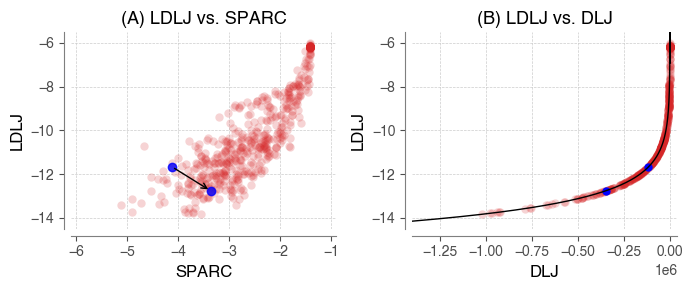

In [24]:
fig = plt.figure(figsize=(7, 3))
N = 500
_inx = [120, 250]
ax = fig.add_subplot(121)
ax.plot(sparc_smooth1[:N], ldlj_smooth1[:N], 'o', color='tab:red', alpha=0.2,
        markeredgewidth=0.0)
ax.plot(sparc_smooth1[_inx[0]], ldlj_smooth1[_inx[0]], 'o', color='blue', alpha=0.8)
ax.plot(sparc_smooth1[_inx[1]], ldlj_smooth1[_inx[1]], 'o', color='blue', alpha=0.8)
# Define the points between which you want to draw the arrow
point1 = {'x': sparc_smooth1[_inx[0]], 'y': ldlj_smooth1[_inx[0]]}
point2 = {'x': sparc_smooth1[_inx[1]], 'y': ldlj_smooth1[_inx[1]]}

# Add an arrow between the two points
plt.annotate('', xy=(point2['x'], point2['y']),
             xytext=(point1['x'], point1['y']),
             arrowprops=dict(arrowstyle='->', color='black'))

ax.set_xlim(-6.1, -0.9)
ax.set_ylim(-14.5, -5.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.grid(color='0.8', linestyle='--', linewidth=0.5);

ax.set_ylabel("LDLJ", fontsize=12)
ax.set_xlabel("SPARC", fontsize=12)
ax.set_title("(A) LDLJ vs. SPARC", fontsize=13);

ax = fig.add_subplot(122)
ax.plot(dlj_smooth1[:N], ldlj_smooth1[:N], 'o', color='tab:red', alpha=0.2,
        markeredgewidth=0.0)
ax.plot(dlj_smooth1[_inx[0]], ldlj_smooth1[_inx[0]], 'o',
        color='blue', alpha=1.0, markeredgewidth=0.0)
ax.plot(dlj_smooth1[_inx[1]], ldlj_smooth1[_inx[1]], 'o',
        color='blue', alpha=1.0, markeredgewidth=0.0)
_x = np.arange(-1.5e6, 0.001e6, 0.01e2)
_y = - np.log(np.abs(_x))
ax.plot(_x, _y, lw=1, color='k')
ax.set_xlim(-1.4e6, 0.04e6)
ax.set_ylim(-14.5, -5.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.grid(color='0.8', linestyle='--', linewidth=0.5);

ax.set_ylabel("LDLJ", fontsize=12)
ax.set_xlabel("DLJ", fontsize=12)
ax.set_title("(B) LDLJ vs. DLJ", fontsize=13);

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(base_fig_dir, f"smm_equiv.pdf"), bbox_inches="tight")
fig.savefig(pathlib.Path(base_fig_dir, f"smm_equiv.svg"), bbox_inches="tight")